In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state = 42)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)
test_seq = pad_sequences(test_input, maxlen = 100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
earlystopping_cb = keras.callbacks.EarlyStopping(patience= 3, restore_best_weights= True)
history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, earlystopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 26ms/step - loss: 0.6921 - accuracy: 0.5548 - val_loss: 0.6910 - val_accuracy: 0.6028
Epoch 2/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6893 - accuracy: 0.6090 - val_loss: 0.6873 - val_accuracy: 0.6232
Epoch 3/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6837 - accuracy: 0.6383 - val_loss: 0.6798 - val_accuracy: 0.6512
Epoch 4/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6718 - accuracy: 0.6575 - val_loss: 0.6620 - val_accuracy: 0.6656
Epoch 5/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6355 - accuracy: 0.6788 - val_loss: 0.5963 - val_accuracy: 0.7096
Epoch 6/100
313/313 [==============================] - 7s 24ms/step - loss: 0.5701 - accuracy: 0.7392 - val_loss: 0.5560 - val_accuracy: 0.7476
Epoch 7/100
313/313 [==============================] - 8s 26ms/step - loss: 0.5425 - accuracy: 0.7538 - val_loss: 0.5362 - val_accuracy

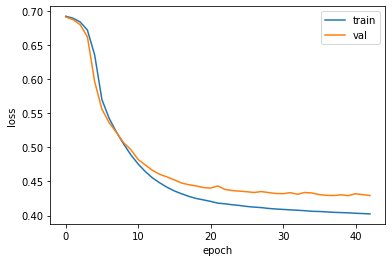

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [8]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8, dropout = 0.3))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-w-dropout-model.h5')
earlystopping_cb = keras.callbacks.EarlyStopping(patience= 3, restore_best_weights= True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, earlystopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 23ms/step - loss: 0.6924 - accuracy: 0.5361 - val_loss: 0.6915 - val_accuracy: 0.5880
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6903 - accuracy: 0.5893 - val_loss: 0.6889 - val_accuracy: 0.6240
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6861 - accuracy: 0.6326 - val_loss: 0.6832 - val_accuracy: 0.6518
Epoch 4/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6749 - accuracy: 0.6406 - val_loss: 0.6612 - val_accuracy: 0.6350
Epoch 5/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6279 - accuracy: 0.6875 - val_loss: 0.6106 - val_accuracy: 0.7230
Epoch 6/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5957 - accuracy: 0.7319 - val_loss: 0.5877 - val_accuracy: 0.7426
Epoch 7/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5753 - accuracy: 0.7458 - val_loss: 0.5687 - val_accuracy

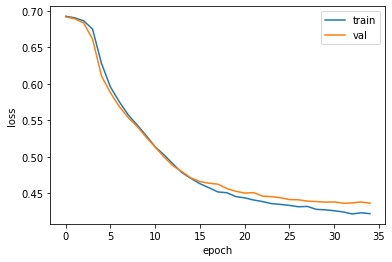

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [12]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length = 100))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [13]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2LSTM-model.h5')
earlystopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model3.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                     validation_data = (val_seq, val_target),
                     callbacks = [checkpoint_cb, earlystopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 47ms/step - loss: 0.6928 - accuracy: 0.5145 - val_loss: 0.6923 - val_accuracy: 0.5660
Epoch 2/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6896 - accuracy: 0.5867 - val_loss: 0.6846 - val_accuracy: 0.6474
Epoch 3/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6569 - accuracy: 0.6705 - val_loss: 0.6154 - val_accuracy: 0.6914
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5912 - accuracy: 0.7042 - val_loss: 0.5695 - val_accuracy: 0.7218
Epoch 5/100
313/313 [==============================] - 13s 43ms/step - loss: 0.5569 - accuracy: 0.7304 - val_loss: 0.5464 - val_accuracy: 0.7344
Epoch 6/100
313/313 [==============================] - 14s 45ms/step - loss: 0.5317 - accuracy: 0.7473 - val_loss: 0.5231 - val_accuracy: 0.7492
Epoch 7/100
313/313 [==============================] - 13s 43ms/step - loss: 0.5113 - accuracy: 0.7600 - val_loss: 0.5120 - val_ac

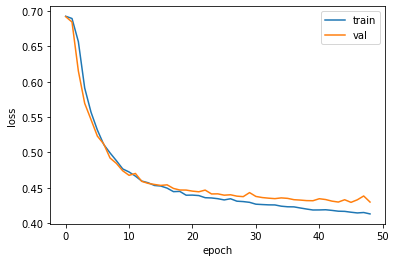

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [16]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [17]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [18]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
earlystopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model4.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                     validation_data = (val_seq, val_target),
                     callbacks = [checkpoint_cb, earlystopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 23ms/step - loss: 0.6925 - accuracy: 0.5217 - val_loss: 0.6907 - val_accuracy: 0.5502
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6894 - accuracy: 0.5620 - val_loss: 0.6876 - val_accuracy: 0.5806
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6850 - accuracy: 0.5936 - val_loss: 0.6827 - val_accuracy: 0.6010
Epoch 4/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6779 - accuracy: 0.6151 - val_loss: 0.6743 - val_accuracy: 0.6214
Epoch 5/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6668 - accuracy: 0.6324 - val_loss: 0.6619 - val_accuracy: 0.6302
Epoch 6/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6497 - accuracy: 0.6513 - val_loss: 0.6427 - val_accuracy: 0.6478
Epoch 7/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6235 - accuracy: 0.6703 - val_loss: 0.6117 - val_accuracy

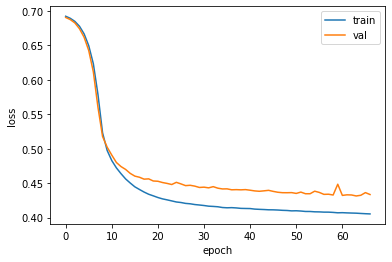

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [20]:
rnn_model = keras.models.load_model('best-2LSTM-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 13s 16ms/step - loss: 0.4234 - accuracy: 0.8024


[0.4233940541744232, 0.8024399876594543]